### Multivariate Linear Regression Task
- 구매자의 연수입(Annual Salary)과 순자산(자산 - 부채, Net Worth), 신용카드 부채(Credit Card Debt)를 통해 다변량 회귀 분석 진행

In [1]:
import pandas as pd

c_df = pd.read_csv('./datasets/car_purchasing.csv')
c_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [2]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [3]:
c_df.isna().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [4]:
c_df.duplicated().sum()

0

In [5]:
columns = ['Gender', 'Age',	'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']

pre_c_df = c_df[columns]
pre_c_df

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [6]:
corr = pre_c_df.corr()
corr

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.066488,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.066488,1.000000,0.000361,0.031748,0.021794,0.633273
Annual Salary,-0.036499,0.000361,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.031748,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.021794,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.633273,0.617862,0.028882,0.488580,1.000000


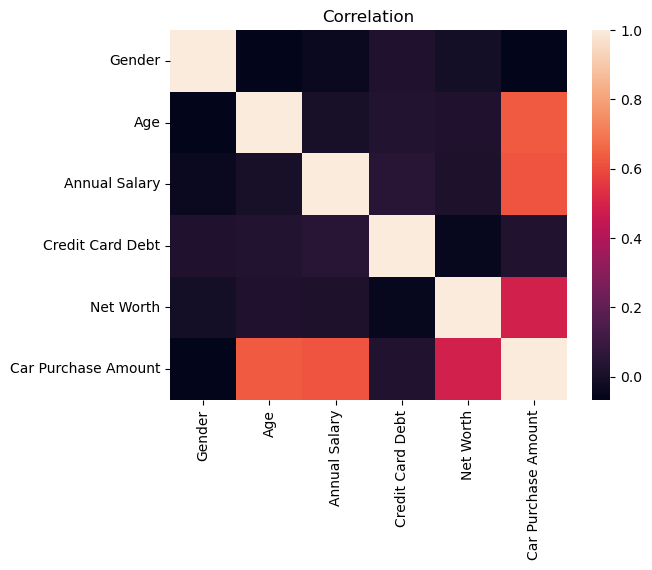

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

hm = sns.heatmap(corr)
hm.set_title('Correlation')
plt.show()

In [8]:
corr['Car Purchase Amount'].sort_values(ascending=False)[1:]

Age                 0.633273
Annual Salary       0.617862
Net Worth           0.488580
Credit Card Debt    0.028882
Gender             -0.066408
Name: Car Purchase Amount, dtype: float64

### 1. 직접 pytorch를 통해 진행

In [20]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

X_train1 = torch.FloatTensor(X_train.Age.values).view(-1, 1)
X_train2 = torch.FloatTensor(X_train['Annual Salary'].values).view(-1, 1)
X_train3 = torch.FloatTensor(X_train['Net Worth'].values).view(-1, 1)
X_train4 = torch.FloatTensor(X_train['Credit Card Debt'].values).view(-1, 1)
X_train5 = torch.FloatTensor(X_train['Gender'].values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test1 = torch.FloatTensor(X_test.Age.values).view(-1, 1)
X_test2 = torch.FloatTensor(X_test['Annual Salary'].values).view(-1, 1)
X_test3 = torch.FloatTensor(X_test['Net Worth'].values).view(-1, 1)
X_test4 = torch.FloatTensor(X_test['Credit Card Debt'].values).view(-1, 1)
X_test5 = torch.FloatTensor(X_test['Gender'].values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W1 = torch.zeros(1, requires_grad=True)
W2 = torch.zeros(1, requires_grad=True)
W3 = torch.zeros(1, requires_grad=True)
W4 = torch.zeros(1, requires_grad=True)
W5 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W1, W2, W3, W4, W5, b], lr=1e-12)

epochs = 1000000

for epoch in range(1, epochs + 1):
    H = W1 * X_train1 + W2 * X_train2 + W3 * X_train3 + W4 * X_train4 + W5 * X_train5 + b
    loss = torch.mean((y_train - H) ** 2)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, W5: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W1.item(), W2.item(), W3.item(), W4.item(), W5.item(), b.item(), loss.item()))

100000/1000000: W1: 0.0099, W2: 0.5165, W3: 0.0284, W4: -0.0146, W5: -0.0000, b: -0.0000, loss: 45465084.0000
200000/1000000: W1: 0.0196, W2: 0.5172, W3: 0.0284, W4: -0.0194, W5: -0.0001, b: -0.0000, loss: 45463748.0000
300000/1000000: W1: 0.0293, W2: 0.5172, W3: 0.0284, W4: -0.0196, W5: -0.0001, b: -0.0001, loss: 45462796.0000
400000/1000000: W1: 0.0390, W2: 0.5172, W3: 0.0284, W4: -0.0196, W5: -0.0001, b: -0.0001, loss: 45461856.0000
500000/1000000: W1: 0.0487, W2: 0.5172, W3: 0.0284, W4: -0.0197, W5: -0.0002, b: -0.0001, loss: 45460920.0000
600000/1000000: W1: 0.0584, W2: 0.5172, W3: 0.0284, W4: -0.0197, W5: -0.0002, b: -0.0001, loss: 45459984.0000
700000/1000000: W1: 0.0681, W2: 0.5172, W3: 0.0284, W4: -0.0197, W5: -0.0003, b: -0.0001, loss: 45459036.0000
800000/1000000: W1: 0.0777, W2: 0.5172, W3: 0.0284, W4: -0.0197, W5: -0.0003, b: -0.0002, loss: 45458096.0000
900000/1000000: W1: 0.0874, W2: 0.5172, W3: 0.0284, W4: -0.0198, W5: -0.0003, b: -0.0002, loss: 45457156.0000
1000000/10

In [22]:
import numpy as np

H = 0.0971 * X_test1 + 0.5172 * X_test2 + 0.0284 * X_test3 + (-0.0198) * X_test4 + (-0.0004) * X_test5 - 0.0002
loss = torch.mean((y_test - H) ** 2)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'.format(loss.item(), np.sqrt(loss.item())))

MSE loss: 44902704.0000, RMSE loss: 6700.9480


### 2. Pytorch에서 행렬의 내적 사용

In [38]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

W = torch.zeros((5, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr=1e-12)

epochs = 1000000

for epoch in range(1, epochs + 1):
    H = X_train.matmul(W) + b
    loss = torch.mean((y_train - H) ** 2)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, W5: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(), W[3].item(), W[4].item(), b.item(), loss.item()))

100000/1000000: W1: -0.0000, W2: 0.0099, W3: 0.5165, W4: -0.0146, W5: 0.0284, b: -0.0000, loss: 45465076.0000
200000/1000000: W1: -0.0001, W2: 0.0196, W3: 0.5172, W4: -0.0194, W5: 0.0284, b: -0.0000, loss: 45463740.0000
300000/1000000: W1: -0.0001, W2: 0.0293, W3: 0.5172, W4: -0.0196, W5: 0.0284, b: -0.0001, loss: 45462800.0000
400000/1000000: W1: -0.0001, W2: 0.0390, W3: 0.5172, W4: -0.0196, W5: 0.0284, b: -0.0001, loss: 45461864.0000
500000/1000000: W1: -0.0002, W2: 0.0487, W3: 0.5172, W4: -0.0197, W5: 0.0284, b: -0.0001, loss: 45460920.0000
600000/1000000: W1: -0.0002, W2: 0.0584, W3: 0.5172, W4: -0.0197, W5: 0.0284, b: -0.0001, loss: 45459980.0000
700000/1000000: W1: -0.0003, W2: 0.0681, W3: 0.5172, W4: -0.0197, W5: 0.0284, b: -0.0001, loss: 45459036.0000
800000/1000000: W1: -0.0003, W2: 0.0777, W3: 0.5172, W4: -0.0197, W5: 0.0284, b: -0.0002, loss: 45458096.0000
900000/1000000: W1: -0.0003, W2: 0.0874, W3: 0.5172, W4: -0.0198, W5: 0.0284, b: -0.0002, loss: 45457156.0000
1000000/10

In [39]:
import numpy as np
H = X_test.matmul(W) + b
loss = torch.mean((y_test - H) ** 2)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'.format(loss.item(), np.sqrt(loss.item())))

MSE loss: 44915888.0000, RMSE loss: 6701.9317


### 3. Pytorch의 Linear 사용

In [40]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = Linear(5, 1)

optimizer = SGD(l_r.parameters(), lr=1e-12)

epochs = 1000000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100000 == 0:
        print('{:4d}/{}: '\
            .format(epoch, epochs), end="")
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '.format(i+1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

100000/1000000: W1: -0.3107, W2: 0.1273, W3: 0.5169, W4: -0.0183, W5: 0.0284, b: -0.3371, loss: 45453132.0000
200000/1000000: W1: -0.3107, W2: 0.1377, W3: 0.5171, W4: -0.0196, W5: 0.0284, b: -0.3371, loss: 45452084.0000
300000/1000000: W1: -0.3107, W2: 0.1481, W3: 0.5171, W4: -0.0197, W5: 0.0284, b: -0.3371, loss: 45451076.0000
400000/1000000: W1: -0.3107, W2: 0.1586, W3: 0.5171, W4: -0.0197, W5: 0.0284, b: -0.3371, loss: 45450056.0000
500000/1000000: W1: -0.3107, W2: 0.1690, W3: 0.5171, W4: -0.0198, W5: 0.0284, b: -0.3371, loss: 45449048.0000
600000/1000000: W1: -0.3107, W2: 0.1794, W3: 0.5171, W4: -0.0198, W5: 0.0284, b: -0.3371, loss: 45448032.0000
700000/1000000: W1: -0.3107, W2: 0.1899, W3: 0.5171, W4: -0.0198, W5: 0.0284, b: -0.3371, loss: 45447016.0000
800000/1000000: W1: -0.3107, W2: 0.2003, W3: 0.5171, W4: -0.0198, W5: 0.0284, b: -0.3371, loss: 45446004.0000
900000/1000000: W1: -0.3107, W2: 0.2107, W3: 0.5171, W4: -0.0199, W5: 0.0284, b: -0.3371, loss: 45444992.0000
1000000/10

In [41]:
import numpy as np

H = l_r(X_test)
loss = torch.mean((y_test - H) ** 2)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'.format(loss.item(), np.sqrt(loss.item())))

MSE loss: 44902924.0000, RMSE loss: 6700.9644


### 4. Pytorch의 Module을 상속받은 클래스를 직접 정의하여 사용

In [42]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear = Linear(5, 1)

    def forward(self, x):
        return self.linear(x)

In [43]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel()

optimizer = SGD(l_r.parameters(), lr=1e-12)

epochs = 1000000

for epoch in range(1, epochs + 1):
    H = l_r(X_train)
    loss = mse_loss(H, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100000 == 0:
        print('{:4d}/{}: '\
            .format(epoch, epochs), end="")
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '.format(i+1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

100000/1000000: W1: -0.3107, W2: 0.1273, W3: 0.5169, W4: -0.0183, W5: 0.0284, b: -0.3371, loss: 45453132.0000
200000/1000000: W1: -0.3107, W2: 0.1377, W3: 0.5171, W4: -0.0196, W5: 0.0284, b: -0.3371, loss: 45452084.0000
300000/1000000: W1: -0.3107, W2: 0.1481, W3: 0.5171, W4: -0.0197, W5: 0.0284, b: -0.3371, loss: 45451076.0000
400000/1000000: W1: -0.3107, W2: 0.1586, W3: 0.5171, W4: -0.0197, W5: 0.0284, b: -0.3371, loss: 45450056.0000
500000/1000000: W1: -0.3107, W2: 0.1690, W3: 0.5171, W4: -0.0198, W5: 0.0284, b: -0.3371, loss: 45449048.0000
600000/1000000: W1: -0.3107, W2: 0.1794, W3: 0.5171, W4: -0.0198, W5: 0.0284, b: -0.3371, loss: 45448032.0000
700000/1000000: W1: -0.3107, W2: 0.1899, W3: 0.5171, W4: -0.0198, W5: 0.0284, b: -0.3371, loss: 45447016.0000
800000/1000000: W1: -0.3107, W2: 0.2003, W3: 0.5171, W4: -0.0198, W5: 0.0284, b: -0.3371, loss: 45446004.0000
900000/1000000: W1: -0.3107, W2: 0.2107, W3: 0.5171, W4: -0.0199, W5: 0.0284, b: -0.3371, loss: 45444992.0000
1000000/10

In [44]:
import numpy as np

H = l_r(X_test)
loss = mse_loss(H, y_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'.format(loss.item(), np.sqrt(loss.item())))

MSE loss: 44902924.0000, RMSE loss: 6700.9644


### 5. sklearn 사용

In [45]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features, targets = pre_c_df.iloc[:, :-1], pre_c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
print('W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, W5: {:.4f}, b: {:.4f}'\
      .format(l_r.coef_[0], l_r.coef_[1], l_r.coef_[2], l_r.coef_[3], l_r.coef_[4], l_r.intercept_))

W1: 19.7889, W2: 839.5216, W3: 0.5611, W4: 0.0076, W5: 0.0289, b: -42015.4456


In [46]:
prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'\
      .format(mean_squared_error(y_test, prediction), np.sqrt(mean_squared_error(y_test, prediction))))

l_r.score(X_test, y_test)

MSE loss: 56658.4009, RMSE loss: 238.0303


0.9994860618742555

### 평가 함수

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import numpy as np

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(MSLE)
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
        .format(MSE, RMSE, MSLE, RMSLE))

In [ ]:
for i, w in enumerate(l_r.coef_):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
print('b: {:.4f}'\
      .format(l_r.intercept_))
get_evaluation(y_test, prediction)